In [13]:
from cv2 import COLOR_BGR2GRAY, cvtColor, imread, imshow, waitKey
import numpy as np
import matplotlib.pyplot as plt

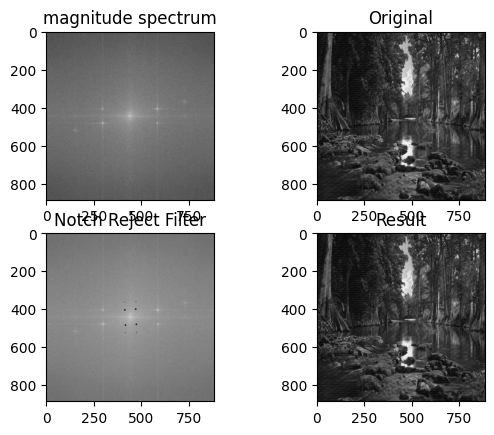

In [14]:
def notch_reject_filter(shape, d0=9, u_k=0, v_k=0):
    P, Q = shape
    # Initialize filter with zeros
    H = np.zeros((P, Q))
    # Traverse through filter
    for u in range(0, P):
        for v in range(0, Q):
            # Get euclidean distance from point D(u,v) to the center
            D_uv = np.sqrt((u - P / 2 + u_k) ** 2 + (v - Q / 2 + v_k) ** 2)
            D_muv = np.sqrt((u - P / 2 - u_k) ** 2 + (v - Q / 2 - v_k) ** 2)
            if D_uv <= d0 or D_muv <= d0:
                H[u, v] = 0.0
            else:
                H[u, v] = 1.0
    return H
#reading image
img = cv2.imread('2.jpg', 0)
#DFT of image
f = np.fft.fft2(img)
#shifting DFT of image
fshift = np.fft.fftshift(f)
phase_spectrumR = np.angle(fshift)
magnitude_spectrum = 20*np.log(np.abs(fshift))
#getting shape of image
img_shape = img.shape
#applying notch reject filter
H1 = notch_reject_filter(img_shape, 4, 38, 30)
H2 = notch_reject_filter(img_shape, 4, -42, 27)
H3 = notch_reject_filter(img_shape, 2, 80, 30)
H4 = notch_reject_filter(img_shape, 2, -82, 28)
NotchFilter = H1*H2*H3*H4
NotchRejectCenter = fshift * NotchFilter 
NotchReject = np.fft.ifftshift(NotchRejectCenter)
#Compute the inverse DFT of the result
inverse_NotchReject = np.fft.ifft2(NotchReject)  
#getting result
Result = np.abs(inverse_NotchReject)
#plotting result
plt.subplot(222)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.subplot(221)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('magnitude spectrum')
plt.subplot(223)
plt.imshow(magnitude_spectrum*NotchFilter, "gray") 
plt.title("Notch Reject Filter")
plt.subplot(224)
plt.imshow(Result, "gray") 
plt.title("Result")
plt.show()